# Final Project Methods Draft

In [2]:
#%%import libraries
import numpy as np                   # functions for data analysis 
import pandas as pd                # functions for data frames
from matplotlib import pyplot as plt
import datetime as datetime

Data were identified and cleaned to reflect the water years from the period of record (WY 2006-2020), and TSS data collections corresponding to two gauge sites on the mainstem of the Ipswich River. 

In [3]:
#specify inputs
filenames=['discharge_Ipswich.txt',  'clean_TSS_data.csv', 'beverly_airport.csv']
drainArea_km=125*1.60934 #sq. km
startyear_WY=datetime.datetime(2005, 10, 1)
startyear_TSS= datetime.datetime(2006,1,1)
endyear=datetime.datetime(2020,9,30)
title='Precipitation, discharge, and TSS concentrations at the Ipswich Dam, MA; WY 2006-2020'

In [4]:
#load TSS dataframe #all TSS data are for Ipswich Dam (ID)

dftss=pd.read_csv(filenames[1], delimiter=',',comment='#', header=0, parse_dates=['Date'], na_values=[-9999, 'NaN'])
dftss.fillna(0) 
dftss=dftss.set_index('Date')
dftss=dftss.rename(columns={'TSS (mg/L)':'tss_mgL', 'Discharge (cfs)': 'discharge_cfs'})
dftss=dftss[['tss_mgL', 'discharge_cfs']]
dftss

,tss_mgL,discharge_cfs
Date,,
2006-12-22,7.61,117.6
2007-01-11,9.83,447.6
2007-02-16,8.14,82.8
2007-03-23,7.83,679.2
2007-04-03,6.50,511.2
...,...,...
2019-07-05,14.80,NaN
2019-07-29,14.10,NaN
2019-08-27,5.60,NaN


In [5]:
#discharge dataframe #original dfq includes entire period of record
dfq=pd.read_csv(filenames[0], delimiter='\t', comment='#', header=1, parse_dates=['20d'], na_values=[-9999, 'NaN'])
dfq.fillna(method='ffill', inplace = True)
dfq=dfq.rename(columns={'20d':'date', '14n': 'discharge'})
dfq=dfq.set_index('date')
dfq=dfq[['discharge']]
#dfq
#copied dataframe that is trimmed to study years (2005-2020)
dfq_trim=dfq.copy()
dfq_trim=dfq_trim[startyear_WY:endyear]
dfq_trim

,discharge
date,
2005-10-01,0.85
2005-10-02,0.84
2005-10-03,1.02
2005-10-04,0.97
2005-10-05,0.91
...,...
2020-09-26,1.17
2020-09-27,1.29
2020-09-28,1.99


In [6]:
# precip dataframe #original precip in inches/standard
dfp=pd.read_csv(filenames[2], delimiter=',', comment='#', header=0, parse_dates=['DATE'], na_values=[-9999, 'NaN'])
dfp.fillna(method='ffill', inplace = True) 
dfp=dfp.rename(columns={'DATE':'date', 'PRCP': 'precip'})
dfp=dfp.set_index('date')
dfp=dfp[['precip']]
dfp

,precip
date,
2005-10-01,0.00
2005-10-02,0.01
2005-10-03,0.01
2005-10-04,0.02
2005-10-05,0.01
...,...
2020-09-26,0.00
2020-09-27,0.00
2020-09-28,0.02


In [7]:
#conversions and calculations

# #convert  discharge from cfs to cubic Liters/second (data reported as daily average)
dfq_trim['discharge']=dfq_trim['discharge']*28.3168 

 #convert precip from inches/day to cm/day
dfp['precip']=dfp['precip']* 2.54

# #convert TSS dataframe #discharge to L/s
dftss['discharge_Ls']= dftss['discharge_cfs']*28.3168

#calculate flux/second
dftss['flux_mgLs']=dftss['tss_mgL']*dftss['discharge_Ls'] #mg/L/s


#
dftss



,tss_mgL,discharge_cfs,discharge_Ls,flux_mgLs
Date,,,,
2006-12-22,7.61,117.6,3330.05568,25341.723725
2007-01-11,9.83,447.6,12674.59968,124591.314854
2007-02-16,8.14,82.8,2344.63104,19085.296666
2007-03-23,7.83,679.2,19232.77056,150592.593485
2007-04-03,6.50,511.2,14475.54816,94091.063040
...,...,...,...,...
2019-07-05,14.80,NaN,NaN,NaN
2019-07-29,14.10,NaN,NaN,NaN
2019-08-27,5.60,NaN,NaN,NaN


A time series plot was created to reflect the precipitation, discharge, and TSS loads throughout the entire period of record.
A second time series plot will show a TSS mass at baseflow conditions

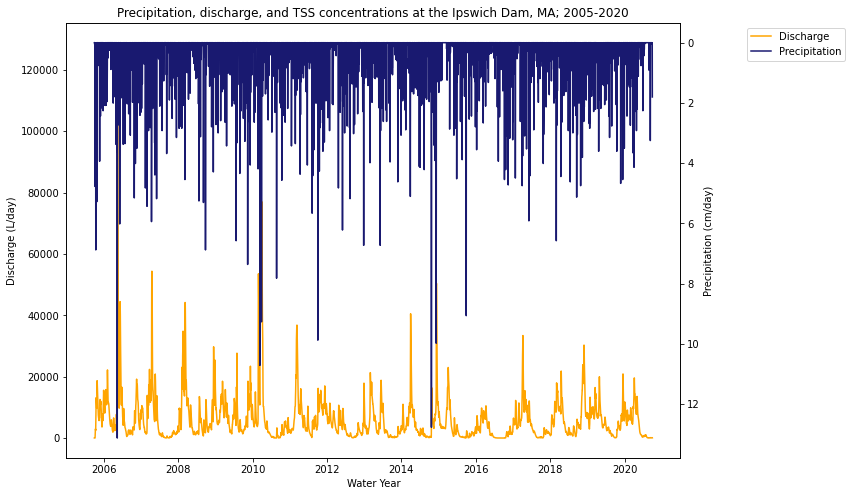

In [8]:
#This cell has a timeseries function that produces:
#1 create timeseries plot of all data over entire period of record- precip and discharge

fig, (ax)= plt.subplots(1,1, sharex=True)
fig.set_size_inches(11,8)
#load data
line1=ax.plot(dfq_trim['discharge'], color='orange', linestyle='-', label='Discharge')
#line1=ax.scatter(y=dftss['tss_mgL'], x=dftss.index, color='black', marker='D', label='TSS (mg/L)')
ax2 = ax.twinx()
line2=ax2.plot(dfp['precip'], color='midnightblue', linestyle='-', label='Precipitation')
#set titles and axis
ax2.invert_yaxis()
ax.set_ylabel('Discharge (L/day)')
ax2.set_ylabel('Precipitation (cm/day)') #this will change!!!
ax.set_xlabel('Water Year')
ax.set_title(title)
lines=line1+line2
labs=[l.get_label() for l in lines]
ax.legend(lines, labs,bbox_to_anchor=(1.1,1), loc='upper left')

Text(0.5, 1.0, 'TSS Flux, Ipswich Dam, Ipswich, MA; 2006-2020')

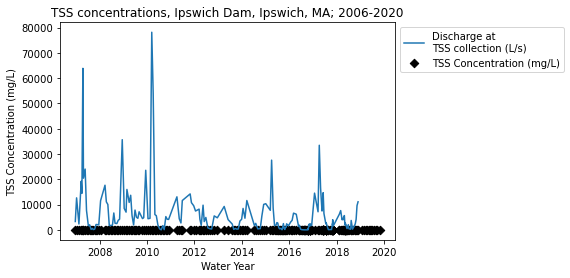

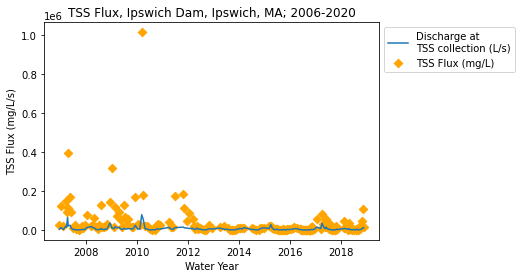

In [9]:
#this cell produces 2 plots:
#2 scatter plot of TSS concentrations over time (mg/L)
#3 scatter plot of TSS flux (mg/L/s) over discharge

# TSS concentrations scatter plot over entire period of record
fig, (ax)=plt.subplots(1,1, sharex=True)
ax.plot(dftss['discharge_Ls'], label='Discharge at \nTSS collection (L/s)')
ax.scatter(y=dftss['tss_mgL'], x=dftss.index, color='black', marker='D', label='TSS Concentration (mg/L)')
ax.set_xlabel('Water Year')
ax.set_ylabel('TSS Concentration (mg/L)')
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
ax.set_title('TSS concentrations, Ipswich Dam, Ipswich, MA; 2006-2020')

#tss flux
fig, (ax)=plt.subplots(1,1, sharex=True)
ax.plot(dftss['discharge_Ls'], label='Discharge at \nTSS collection (L/s)')
ax.scatter(y=dftss['flux_mgLs'], x=dftss.index, color='orange', marker='D', label='TSS Flux (mg/L)')
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
ax.set_xlabel('Water Year')
ax.set_ylabel('TSS Flux (mg/L/s)')
ax.set_title('TSS Flux, Ipswich Dam, Ipswich, MA; 2006-2020')


Within the cleaned datasets, three storms were identified within 14-year period of record. These storms corresponded to flood frequencies that were determined using the Weibull plotting-position formula. The flood frequencies that were selected represent: a small flooding event (2-year flood), a medium flooding event (25-year flood), and an extreme flood event (100-year flood event). These flood frequencies may change depending on what is possible with the discharge data available.

In [10]:
# Weibull plotting position

# Sort data smallest to largest
dfq_sorted = dfq_trim.sort_values(by="discharge")

# Count total obervations
n = dfq_sorted.shape[0]

# Add a numbered column 1 -> n to use in return calculation for rank
dfq_sorted.insert(0, 'rank', range(1, 1 + n))

# Calculate probability - note you may need to adjust this value based upon the time period of your data
dfq_sorted["Exceedance probability"] = ((n - dfq_sorted["rank"] + 1) / (n + 1)) #Exceedance probability
dfq_sorted["return-years"] = (1 / dfq_sorted["Exceedance probability"]) #return period


dfq_sorted=dfq_sorted.sort_values(by='rank', ascending= False)

data=[2, 50, 100,500]
floodfreq=pd.DataFrame(data, columns= ['Return Periods (yrs)'])

dfq_sorted=dfq_sorted.sort_values(by="return-years", ascending=True)
floodfreq['interpvalues']=np.interp(floodfreq['Return Periods (yrs)'],
                                   dfq_sorted['return-years'], dfq_sorted['discharge'])

floodfreq

,Return Periods (yrs),interpvalues
0,2,3794.451200
1,50,28226.062225
2,100,41398.334832
3,500,77083.703591


In [13]:
#storm event dataframe:
#event 1-> 2-year flood-> frequency q-value=3794 L/day; corresponding period between 2/10-2/28/2015
#event 2-> 50-year flood -> frequency q-value=28226 L/day; corresponding period between 4/1-4/15/2017
#event 3--> 100 year flood --> frequency q-value=41398 L/day; corresponding period between 3/10-4/1/2010
###event periods are long due to not having enough TSS data; each event has at least 2 TSS datapoints

storm_start=[datetime.datetime(2015,2,10), datetime.datetime(2017,3,20), datetime.datetime(2010,3,10)]
storm_end=[datetime.datetime(2015,2,28), datetime.datetime(2017,4,15), datetime.datetime(2010,4,1)]
threshold=[56, 141,22625] 
dfstorm=pd.DataFrame(storm_start, columns= ['startdate'])
dfstorm['enddate']=storm_end
dfstorm['threshold']=threshold

dfstorm

,startdate,enddate,threshold
0,2015-02-10,2015-02-28,56
1,2017-03-20,2017-04-15,141
2,2010-03-10,2010-04-01,22625


Statistical analyses were conducted on the raw data from the storm events that corresponded to flood frequencies. Methods from Lab 9 were utilized to find: antecedant discharge and the date and time of hydrograph rise, the time of peak discharge during an individual storm event, the end of the storm event, and the end of the discharge from the event (i.e a return to baseflow conditions). Similar analyses were conducted on the TSS data in order to find the point of TSS rise during an event, the time of TSS peak, and the time that TSS masses returned to baseflow conditions. These analyses were integrated with precipitation data. Raw precipitation data was analyzed for the maximum intensity during the storm event (i.e the highest quantity of rainfall during the shortest period of time), and the precipitation centroid lag to peak, which gives a time value (hourly) to how long it takes the discharge flow responses to show the rainfall from a precipitation event. This same type of analysis was applied to TSS, in order to find how long of a lag there is between precipitation centroid, discharge response, and TSS response. 

In [15]:
#statistical analysis for flood frequencies #refer to Lab 9!

def hydrosep (totalq, threshold):

    totalq['diffq']=totalq['discharge'].diff()
    antq=(totalq.loc[totalq['diffq']> threshold, 'discharge']) 
    antq_value=antq[0]
    print("the antecdenant discharge= " + str(antq_value))
    antq_date=antq.index[0]
    print('antq_date= '+ str(antq_date)) #time of inflection/ discharge rise
    peakq_date=totalq['discharge'].idxmax() #peak discharge
    print('peak date= ' + str(peakq_date))
    n=0.82*((drainArea_km/1.076e7)**0.2)
    print("n="+ str(n))
    #calculate event duration
    n_date=pd.Timedelta(n, unit='d')
    end_event=n_date+peakq_date
    print('end event = '+ str(end_event))
    discharge_end=totalq.iloc[totalq.index.get_loc(end_event, method='nearest'), 0] #value of discharge at the end event
    print('the discharge end is ' + str(discharge_end))
    baseq= totalq[['discharge']].copy()
    baseq=baseq[:end_event]
    return baseq, antq, antq_date, peakq_date, end_event, discharge_end


In [16]:
#analyse precipitation for stats
def analyzeprecip(dfqinput, dfpinput, threshold):
    dfp=dfpinput.copy()
    dfq=dfqinput.copy()
    
    baseq, antq, antq_date, peakq_date, end_event, discharge_end= hydrosep (dfq, threshold)
    
    totalPinput= dfp.sum() #total water input
    print('Total water input  = ' + str(totalPinput)+ " cm")
    totalQinput= (dfq-baseq).sum()/4 #total discharge output
    print("the total discharge  = " + str(totalQinput) + " cm")
    totaleventflow=dfq.loc[antq_date:end_event].sum()/4 #total event flow
    print('total event flow = ' + str(totaleventflow) + ' cm')
    maxprecip= dfp.max() # maximum precip intensity (cm/hr)
    print ("maximum precip intensity = " + str(maxprecip) + " cm/hr")
    maxdischarge= dfq.max() #peak event discharge
    print ('peak event discharge = ' + str(maxdischarge) + " cm/hr")
    inputdays=dfp.loc[dfp.values>.001]  #duration of water input, days
    inputdurr= inputdays.index[-1]- inputdays.index[0]
    print('duration of water input = ' + str(inputdurr) + 'days')
    #precip centroid here we go!
    dfp['timesecond']= dfp.index.astype('int64')/1e9
    precip_centroid=(np.sum(dfp['timesecond']*dfp['precip']/np.sum(dfp['precip'])))
    precip_centroid_date=datetime.datetime.fromtimestamp(precip_centroid)
    centroid_lag=peakq_date-precip_centroid_date
    print('the precipitation centroid lag to peak discharge = ' + str(centroid_lag) + ' days')
    #timeseriesplot(dfqinput, dfpinput, baseq)
    return (totalPinput, totalQinput, totaleventflow, maxprecip, maxdischarge, antq, inputdurr, precip_centroid)


In [20]:
# for loop for timeseries #it doesn't work!
for i, v in enumerate (dfstorm['startdate']):
    totalq=dfq_trim.loc[dfstorm.iloc[i,0]:dfstorm.iloc[i,1], 'discharge'] 
    threshold=dfstorm.iloc[i,2] 
    #baseq, antq, antq_date, peakq_date, end_event, discharge_end= hydrosep(totalq, threshold)
    finaldate=dfstorm.iloc[i, 1]
    subq= dfq_trim[v[0]: v[1]]
    subtss=dftss[v[0]:v[3]]
    subp= dfp[v[0]: v[1]]
    timeseriesplot(dfq_trim, dftss, dfp) 
 

KeyError: 'discharge'

In [19]:
#repeat for TSS #different names!

#TSS dataframe: create difference data  (.diff)
#use difference data to find:
##antecedant TSS for pre-storm values
##antecedant date: inflection point in time ##this is the mobilization point of TSS in each storm
##TSS_peak_date: time of TSS peak 
#calculate TSS value that corresponds to TSS peak
#value after peak: should indicate point of reduction following TSS peak
##n=0.82*((drainageA/1.076e7)**0.2) 
##n_date=pd.Timedelta(n, unit='d')
##end_event=n_date+peakq_date
##TSS_storm_end: end of flood TSS discharges

#make into function

In [ ]:
#integrate precipitation, discharge, and TSS data for further analysis

#Precipitation intensity and maximum (i.e precip peak)
#Precipitation centroid and lag-to-peak
#TSS centroid : the center of mobilization during a storm event

#function

The statistical analyses were utilized in one hydrograph for each storm. A 'for-loop' similar to what was used in Lab 9 was utilized to run each storm iteration through the timeseries. Further statistical analysis was conducted on the hydrographs to find the percentage of TSS mobilization that occured during the rising limb of the hydrograph.

In [ ]:
#create a for loop that itterates flood frequency, discharge statistical analysis, and TSS stats through other dataframes and plots
#part of this will be appending arrows to flood frequency events
#isolate three flood frequency events from larger time series

In [ ]:
#isolate and plot three storm events using a function and for loop
#append arrows to show: 1) precipitation peak 2) discharge peak 3)TSS inflection point 4)TSS peak 5)TSS reduction point

#use statistics to sum the TSS mobilization on the rising limb, vs. falling limb.

Three hysteresis curves were created using a scatter plot. The hysteresis curves help visualize TSS mobilization throughout a storm event based on the statistics from the hydrographs.

In [ ]:
#create 3 hysteresis plots for 3 storm events
#do statistics on these? HOW!
#its a scatter plot
#ax.scatter(time as a color gradient to show which way hysteresis is going ) # concentration vs. discharge